In [6]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../../pyscan')

import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + runinfo.loop1.i*runinfo.loop0.n + \
           runinfo.loop2.i*runinfo.loop0.n*runinfo.loop1.n + \
           runinfo.loop3.i*runinfo.loop0.n*runinfo.loop1.n*runinfo.loop2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    return d

In [8]:
# Setup devices as members of an ItemAttribute instance
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [9]:
# 1D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.5)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices, time=True)
expt.start_thread()


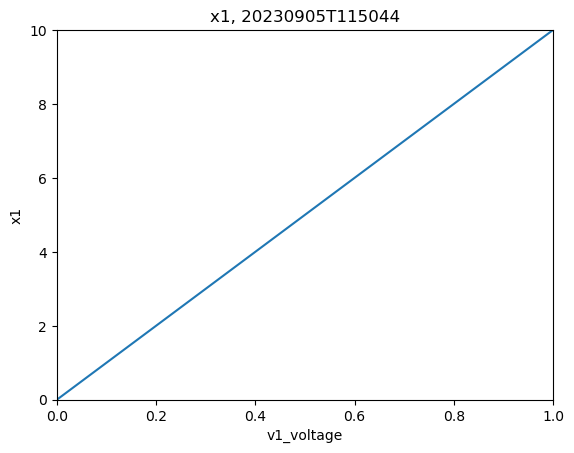

In [10]:
ps.live_plot1D(expt)

In [11]:
# 2D data
# Create RunInfo instance and set loop0 and loop1 to PropertyScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.5)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.5)

# Set RunInfo measure_function (remember, it takes a Sweep object as a parameter and 
# returns an ItemAttribute containing data)
runinfo.measure_function = generate_multiD_data

# Create a Sweep class with the RunInfo and Devices just created
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


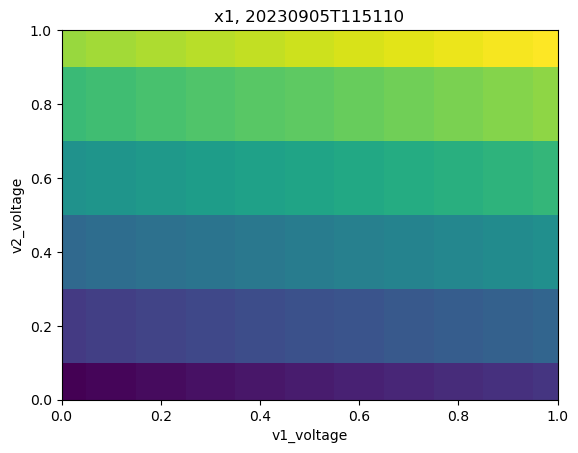

In [12]:
ps.live_plot2D(expt)

In [13]:
# 2D data, 2 instruments in loop0
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1),
                                 'v3': ps.drange(1, 0.1, 2)}, prop='voltage', dt=0.5)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.5)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


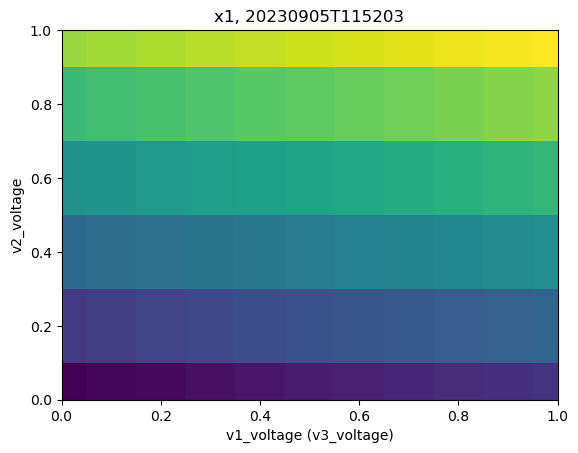

In [14]:
ps.live_plot2D(expt)